Exercise 3.1: Plotting experimental data

IN the on-line resources you will find a file called sunspots.txt, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a) Write a program that reads in the data and makes a graph of sunspots as a function of time.

b) Modify your program to display only the first 1000 data points on the graph.

c) Modify your program further to calculate and plot the running average of the data, defined by
$$Y_{k}=\frac{1}{2r+1}\sum_{-r}^{r}y_{k+m}$$
where $r=5$ in this case (and the $y_k$ are the sunspots numbers). Have the program plot both the original data running average on the same graph, again over the range covered by the first 1000 data points.

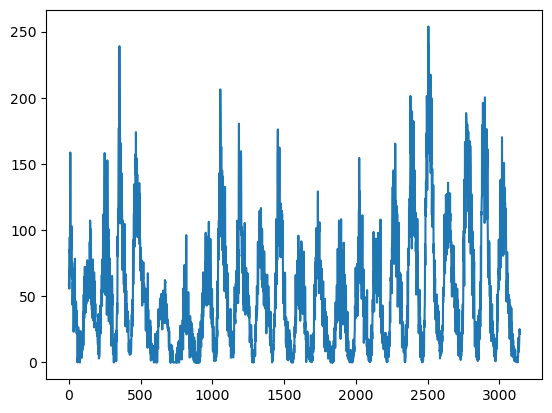

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("sunspots.txt", float)

x = data[:,0]
y = data[:,1]

plt.plot(x,y)
plt.show()

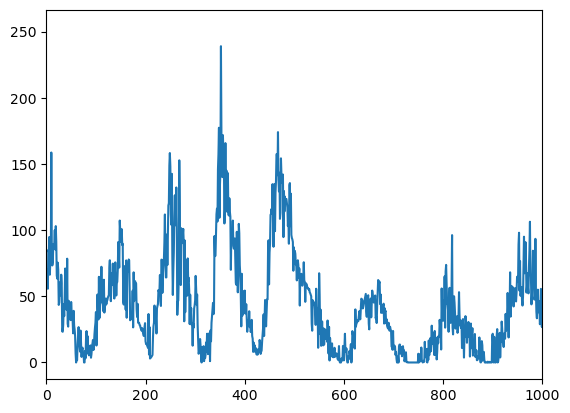

In [11]:
x = data[:,0]
y = data[:,1]

plt.plot(x,y)
plt.xlim(0,1000)

plt.show()

In [20]:
def run_avg(y_k):
    r = 5
    avg_Y = []
    for k in range(1000):
        Y_k = 0
        for m in range(-r,r+1):
            Y_k += y_k[k+m]
        avg_Y.append(Y_k * (1/(2*r + 1)))
    return avg_Y


In [21]:
Y = run_avg(y)

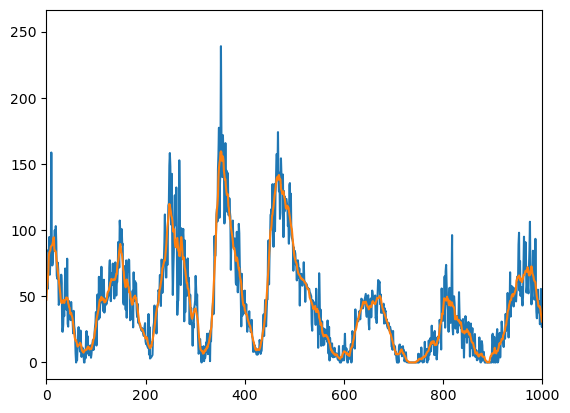

In [23]:
plt.plot(x, y)
plt.plot(x[:1000], Y)
plt.xlim(0,1000)

plt.show()

Exercise 3.2: Curve plotting

Although the plot function is designed primarily for plotting standard $xy$ graphs, it can be adapted for other kinds of plotting as well.

a) Make a plot of the so-called deltoid curve, which is defined parametrically by the equations
$$x=2\cos{\theta} + \cos{2\theta}, ~~~~y=2\sin{\theta}-\sin{2\theta},$$
where $0\leq\theta \leq 2\pi.$ Take a set of values of $\theta$ between zero and $2\pi$ and calculate $x$ and $y$ for each from the equations above, then plot $y$ as a function of $x$.

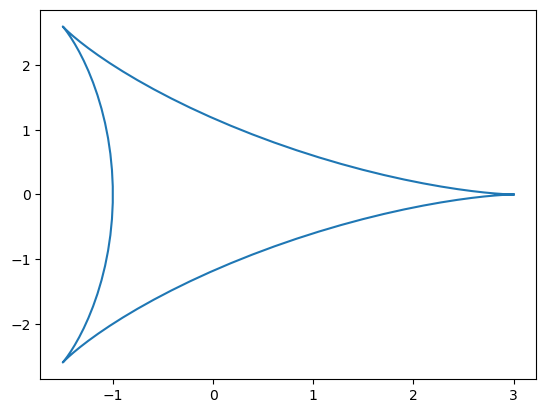

In [24]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 100)
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)

plt.plot(x, y)

b) Taking this approach a step further, one can make a polar plot $r=f(\theta)$ for some function $f$ by calculating $r$ for a range of values of $\theta$ and then converting $r$ and $\theta$ to Cartesian coordinates using the standard equations $x=r\cos{\theta}$, $y=r\sin{\theta}$. Use this method to make a plot of the Galilean spiral $r=\theta^2$ for $0\leq \theta \leq 10 \pi$.

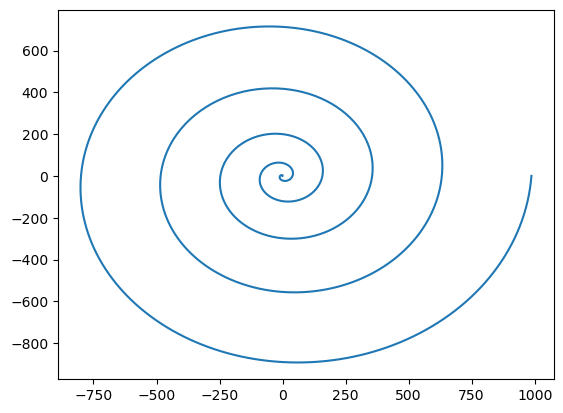

In [26]:
theta = np.linspace(0, 10*np.pi, 1000)
r = theta**2

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x, y)

c) Using the same method, make a polar plot of "Fey's function"
$$r=e^{\cos{\theta}}-2\cos{4\theta}+\sin^5{\theta/12}$$
in the range $0\leq\theta\leq 24\pi$.

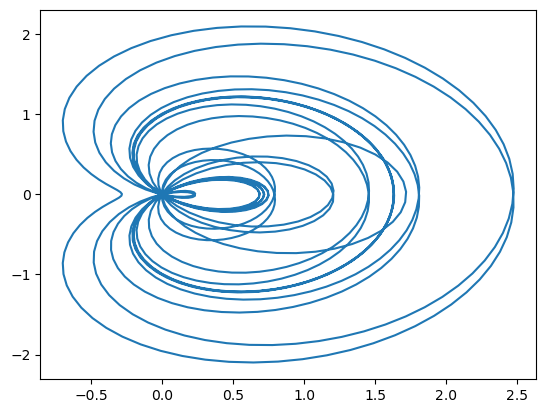

In [31]:
theta = np.linspace(0, 24*np.pi, 1000)
r =np.exp(np.cos(theta)) - 2*np.cos(4*np.pi) + (np.sin(theta/12))**5

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x, y)

Exercise 3.3: There is a file in the on-line resources called stm.txt, which contains a grid of values from scanning tunneling microscope measurements of the (111) surface of silicon. A scanning tunneling microscope (STM) is a device that measures the shape of a surface at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling current as a function of position. The end result is a grid of values that represent the height of the surface and the file stm.txt contains just such a grid of values. Write a program that reads the data contained in the file and makes a density plot of the values. Use the various options and variants you have learned about to make a picture that shows the structure of the silicon surface density. 

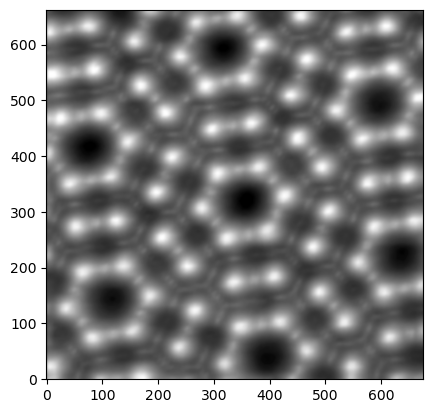

In [34]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('stm.txt', float)

plt.imshow(data, origin='lower')
plt.gray()

plt.show()

In [1]:
from vpython import sphere

<IPython.core.display.Javascript object>

In [1]:
#sphere()   This takes too long so I won't use jupyter notebook for this part

3.6 Deterministic chaos and the Feigenbaum plot: One of the most famous examples of the phenomenon of chaos is the logistic map, defined by the equation
$$x'=rx(1-x).$$
For a given value of the constant $r$ you take a value of $x$-say $x=1/2$- and feed it into the right-hand side of this equation, which gives you a value of $x'$. Then you take that value and feed it back in on the right-hand side again, which gives you another value, and so forth. This is an iterative map. You keep doing the same operation over and over on your value of $x$, and one of three things happens:

1. The value settles down to a fixed number and it stays there. This is called a fixed point. For instance, $x=0$ is always a fixed point of the logistic map. 
2. It doesn't settle down to a single value, but it settles down into a periodic pattern, rotating around a set of values, such as say four values, repeating them in sequence over and over. This is called a limit cycle.
3. It goes crazy. It generates a seemingly random sequence of numbers that appear to have no rhyme or reason to them at all. This is deterministic chaos. "Chaos" because it really looks chaotic, and "deterministic" because even though the values look random, they're not. They're clearly entirely predictable, because they are given to you by one simple equation. The behavior is determined, although it may not look like it.

Write a program that calculates and displays the behavior of the logistic map. Here's what you need to do. For a given value $r$, start with $x=1/2$, and iterate the logistic map equation a thousand times. That will give it a chance to settle down to a fixed point or limit cycle if it's going to. Then run for another thousand iterations and plot the points $(r,x)$ on a graph where the horizontal axis is $r$ and the vetical axis is $x$. You can either use the plot function with the options "ko" or "k" to draw a graph with dots, one for each point, or you can use the scatter function to draw a scatter plot (which always uses dots). Repeat the whole calculation for values of $r$  on the same figure and then finally using the function show once to display the complete figure.

Your program should generate a distinctive plot that looks like a tree bent over onto its side. This famous picture is called the Feingenbaum plot, after its discoverer Mitchell Feingenbaum, or sometimes the figtree plot, a play on the fact that it looks like a tree and Feingenbaum means "figtree" in German.

Give answers to the following questions:

      a) For a given value of $r$ what would a fixed point look like on the Feingenbaum plot? How about a limit cycle? And what would chaos look like?
      b) Based on your plot, at what value of $r$ does the system move from orderly behavior (fixed points or limit cycles) to chaotic behavior? This point is sometimes called the "edge of chaos".
    
The logistic map is a very simple mathematical system, but deterministic chaos is seen in many more complex physical systems also, including especially fluid dynamics and the weather. Because of its apparently random nature, the bahavior of chaotic systems is difficult to predict and strongly affected by small perturbations in outside conditions. You've probably heard of the classic exemplar of chaos in weather systems, the butterfly effect, which was popularized by physicist Edward Lorenz in 1972 when he gave a lecture to the American Association for the Advancement of Science entitled, "Does the flap of a butterfly's wings in Brazil set off a tornado in Texas?"

In [24]:
#x'=rx(1-x)
def log_map(r):
    x = 0.5
    for n in range(1000):
        x = r*x*(1-x)
        
    for n in range(1000):
        x = r*x*(1-x)
    return x

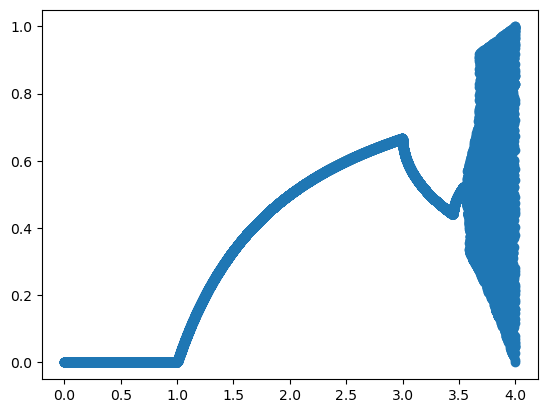

In [25]:
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0,4,0.0001)
x = log_map(r)

plt.scatter(r,x)
plt.show()

a)It would be just one point for a fixed point and we can see it in the plot as a continuos line.
For a limit cycle it should look like two-four lines in the plot (from 3-3.5).
Chaos is just random numbers like we can see in the plot for $r>3.5$.

b) for $r\approx 3.5$

3.7 The Mandelbrot set: The Mandelbrot set, named after its discoverer, the French mathematician Benoit Mandelbrot, is a fractal, an infinitely ramified mathematical object that contains structure within structure within structure, as deep as we care to look. The definition of the Mandelbrot set is in terms of complex numbers as follows.

Consider the equation
$$z'=z^2 + c,$$
where $z$ is a complex number and $c$ is a complex constant. For any given value of $c$ this equation turns an input number $z$ into an output number $z'$. The defintion of the Mandelbrot set involves the repeated iteration of this eqaution: we take an initial starting value of $z$ and feed it into the equation to get a new value $z'$. Then we take that value and feed it in again to get another value, and so forth. The Mandelbrot set is the set of points in the complex plane that satisfies the following defintion:

   For a given complex value of $c$, start with $z=0$ and iterate repeatedly. If the magnitude $|z|$ of the resulting value is ever greater than 2, then the point in the complex plane at position $c$ is not in the Mandelbrot set, otherwise it is in the set.
    
In order to use this definition one would, in principle, have to iterate infinitely many times to prove that a point is in the Mandelbrot set, since a point is in the set only if the iteration never passes $|z|=2$ ever. In practice, however, one usually just performs some large number of iterations, say 100, and if $|z|$ hasn't exceeded 2 by that point then we call that good enough.

Write a program to make an image of the Mandelbrot set by performing the iteration for all values of $c=x+iy$ on an $N\times N$ grid spanning the region where $-2\leq x \leq 2$ and $-2\leq y \leq 2$. Make a density plot in which grid points inside the Mandelbrot set are colored black and those outside are colored white. The Mandelbrot set has a very disctinctive shape that looks something like a beetle with a long snout-you'll know it when you see it.

Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a small value of $N$-perhaps $N=100$- so that your program runs quickly while you are testing it. Once you are sure it is working correctly, increase the value of $N$ to produce a final high-quality image of the shape of the set.

If you're feelin enthusiastic, here is another variant of the same exercise that can produce amazing looking pictures. Instead of coloring points just black and white, color points acoording to their number of iterations of the eqaution before $|z|$ becomes greater than 2 (or the maximum number of iterations if $|z|$ never becomes greater than 2). If you use one of the more colorful color schemes Python provides for density plots, such as "hot" or "jet" schemes, you can make some spectacular images this way. Another interesting variant is to color acoording to the logarithm of the number of iterations, which helps reveal some of the finer structure outside the set.

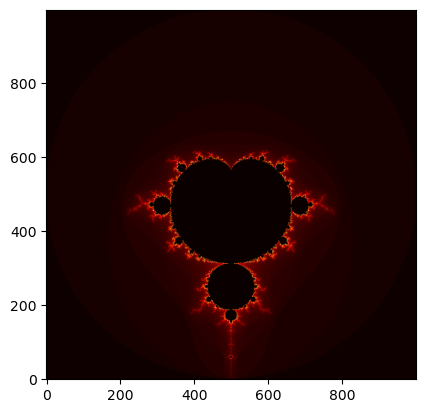

In [40]:
import numpy as np
import matplotlib.pyplot as plt
#c=x + iy, -2<=x<=2 and -2<=y<=2
#we start with z=0
N = 1000
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

grid = np.zeros((N, N))
grid_unos = np.zeros((N,N))

def equation_M(z, x, y):
    return (z**2 + complex(x, y))

for i in range(len(x)):
    for j in range(len(y)):
        z = 0 + 0j
        n = 0
        while n < 100:
            if abs(z) > 2:
                grid[i][j] = n
                break
            n += 1
            z = equation_M(z, x[i], y[j])

plt.imshow(grid, cmap='hot', origin='lower')            

3.8 Least-squares fitting and the photoelectric effect.

m: 4.088227358517502e-15
c: -1.73123580398135


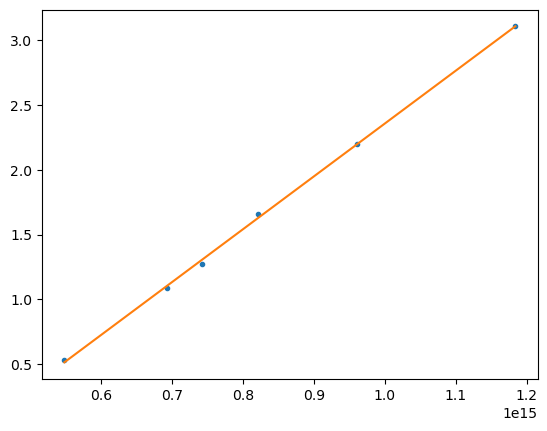

In [56]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("millikan.txt")

x = data[:,0]
y = data[:,1]

E_x = (1/len(x))*sum(x)
E_y = (1/len(y))*sum(y)
E_xx = (1/len(x))*sum(x*x)
E_xy = (1/len(x))*sum(x*y)

m = (E_xy - E_x*E_y)/(E_xx-E_x**2)
c = (E_xx*E_y - E_x*E_xy)/(E_xx-E_x**2)

def fitM(x, m, c):
    return (m*x + c)

y_fit = fitM(x, m, c)

print("m:", m)
print("c:", c)

plt.plot(x, y, ".")
plt.plot(x, y_fit)
plt.show()

In [57]:
e_charge = 1.602*(10**(-19))
planck_h = m*e_charge
print("h =", planck_h)

h = 6.549340228345038e-34
